## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

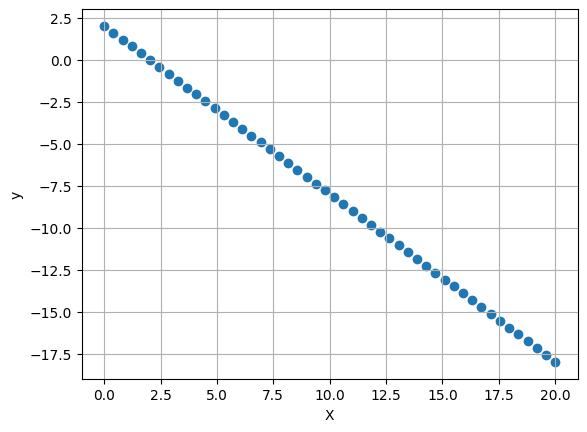

In [4]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def gradientDescent(X, y, alpha, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Iteration {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        theta_0 = theta_0 - alpha * d_theta_0
        theta_1 = theta_1 - alpha * d_theta_1

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} iterations')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
alpha = 0.0005
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = gradientDescent(X, y, alpha, iterations)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new -0.004
theta_1_new -0.05734693

In [7]:
from sklearn.metrics import r2_score
h = theta_0_opt + theta_1_opt * X
r2_score(y, h)

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [8]:
def plot_loss_epoch(loss, alpha):
    plt.plot(loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_theta_loss(theta, loss, alpha, xlabel):
    plt.plot(theta, loss, marker='o')
    plt.title(f'Learning Rate = {alpha}')
    plt.xlabel(xlabel)
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

def plot_lines(X, y, hypothesis):
    for h in hypothesis:
        plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

def plot_best_line(X, y, h):
    plt.plot(X, h, color='r')
    
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.xlabel('y')
    plt.grid()
    plt.show()

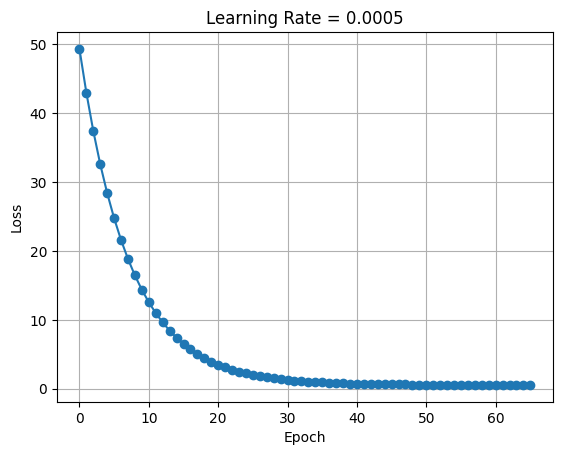

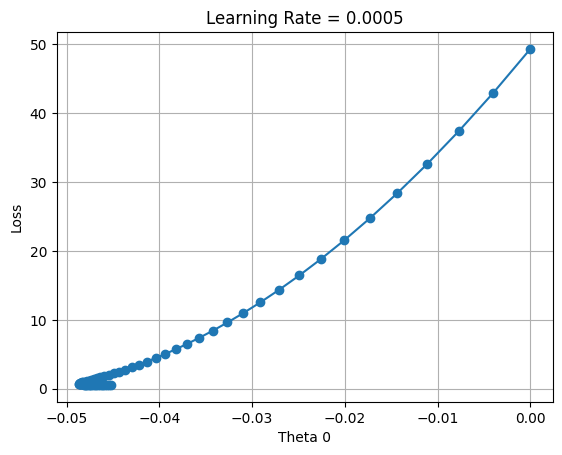

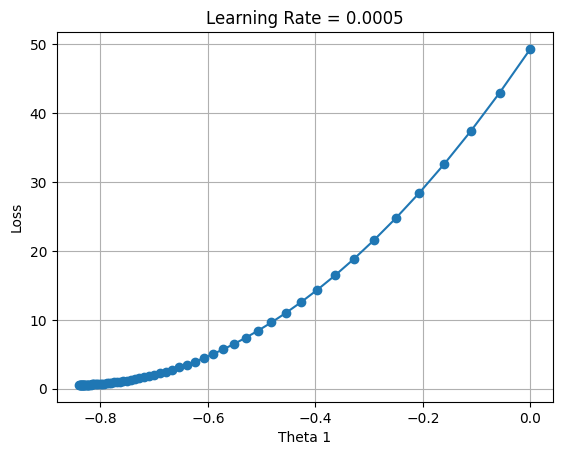

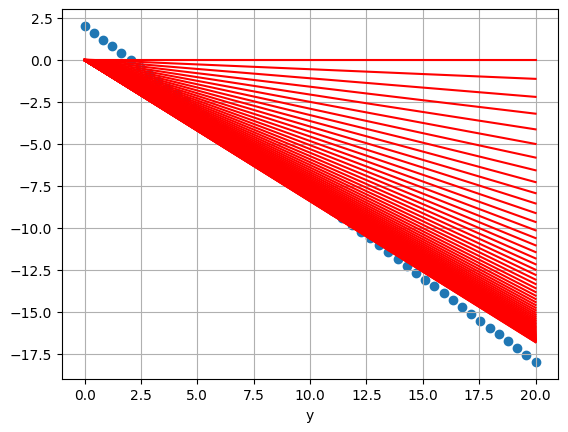

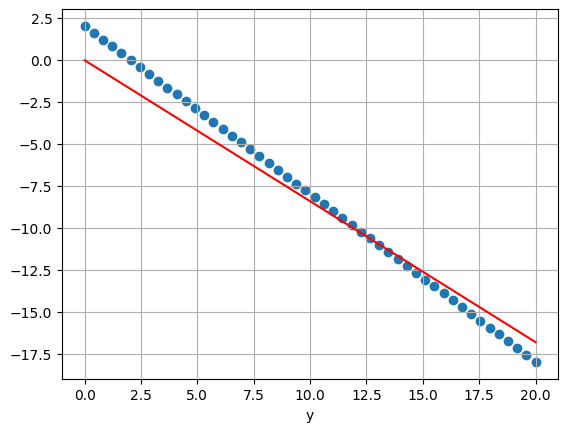

In [9]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [10]:
def momentum_GD(X, y, alpha, gamma, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.001
    v_0 = 0
    v_1 = 0
    theta_0 = 0
    theta_1 = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0 + theta_1 * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0 = np.sum(error) / m
        d_theta_1 = np.sum(error*X) / m

        d_theta = np.array([[d_theta_0],
                            [d_theta_1]])
        
        d_theta_norm = np.linalg.norm(d_theta)

        # 5- Update parameters
        v_0 = alpha * d_theta_0 + gamma * v_0
        v_1 = alpha * d_theta_1 + gamma * v_1
        
        theta_0 = theta_0 - v_0
        theta_1 = theta_1 - v_1

        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_norm)
        print()

        if i > 0:
            if d_theta_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [11]:
alpha = 0.0005
gamma = 0.5
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = momentum_GD(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new -0.004
theta_1_new -0.057346938775

In [12]:
from sklearn.metrics import r2_score
h = theta_0_opt + theta_1_opt * X
r2_score(y, h)

0.9687892837396442

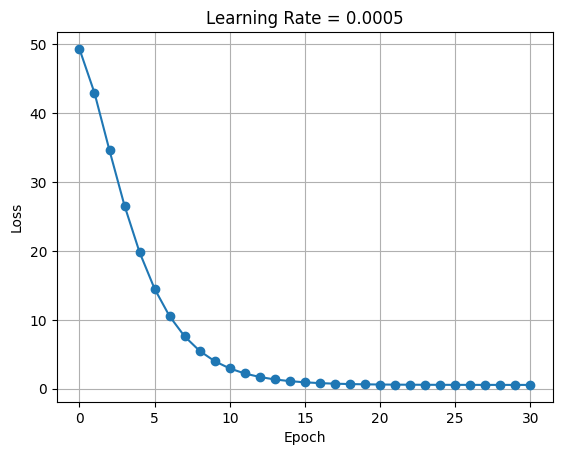

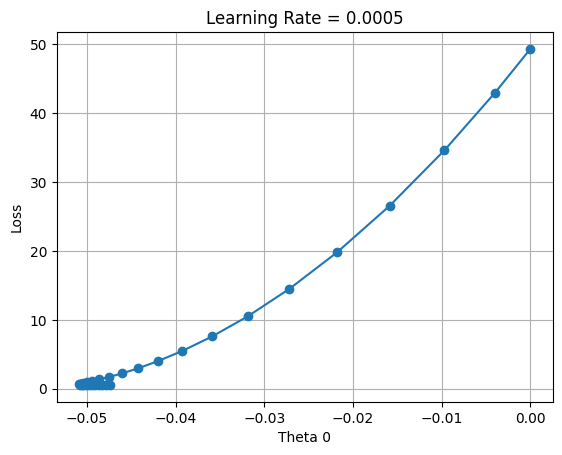

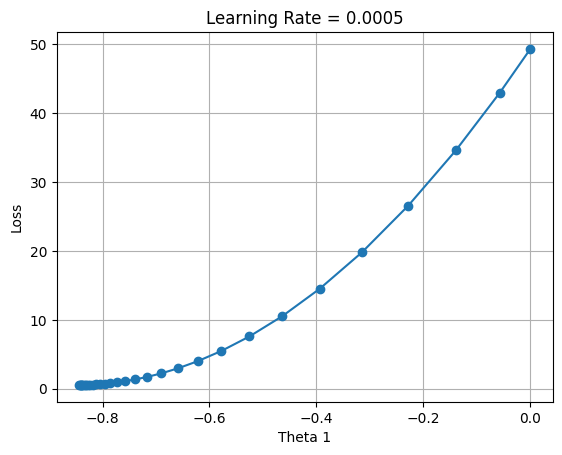

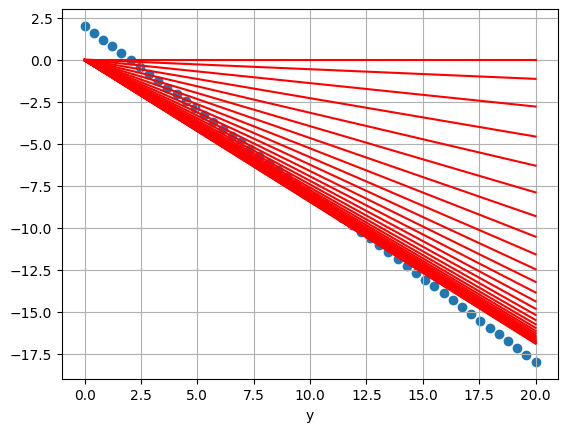

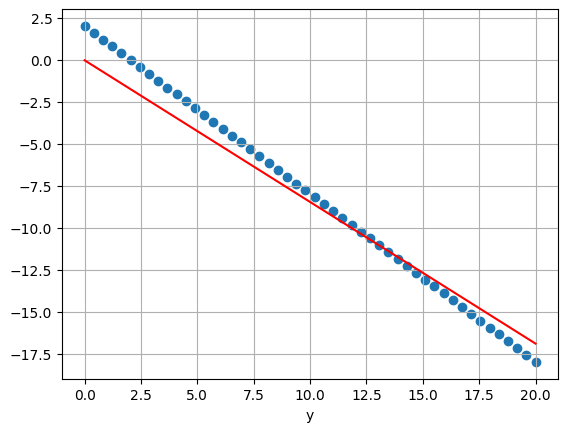

In [13]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [14]:
alpha = 0.0005
gamma = 0.9
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = momentum_GD(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new -0.004
theta_1_new -0.057346938775

In [15]:
h = theta_0_opt + theta_1_opt * X
r2_score(y, h)

0.973589591111118

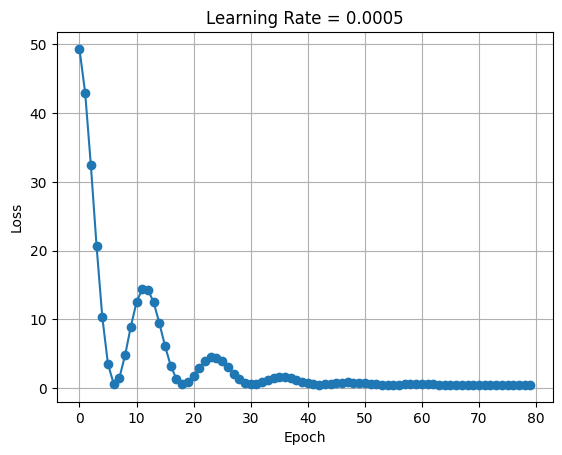

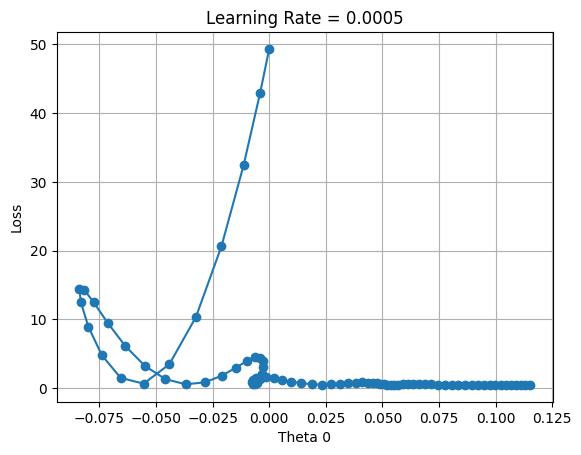

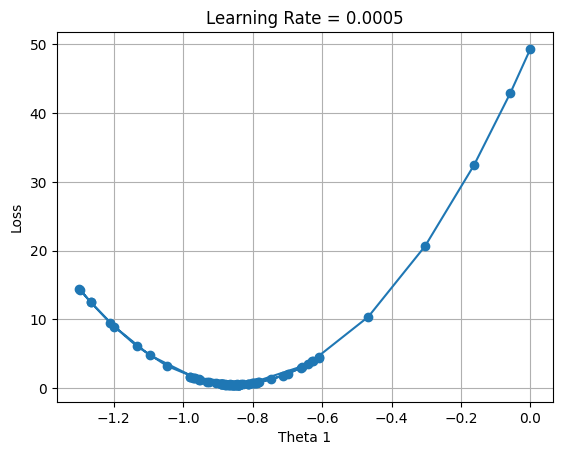

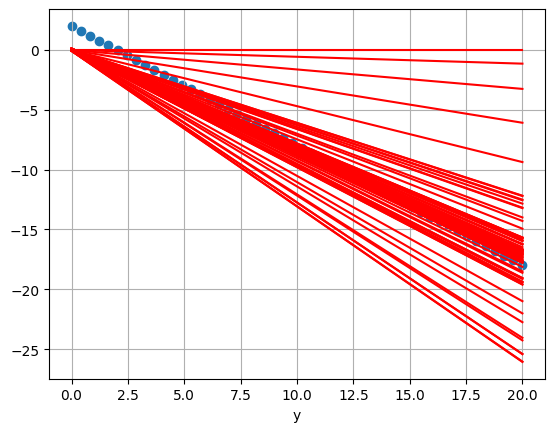

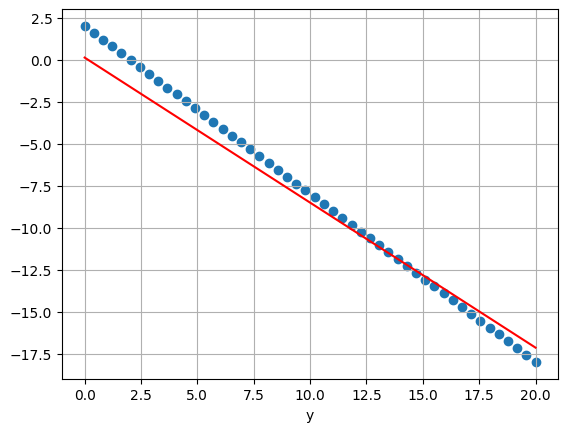

In [16]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [17]:
alpha = 0.0005
gamma = 0.89
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = momentum_GD(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new -0.004
theta_1_new -0.057346938775

In [18]:
h = theta_0_opt + theta_1_opt * X
r2_score(y, h)

0.972435565060376

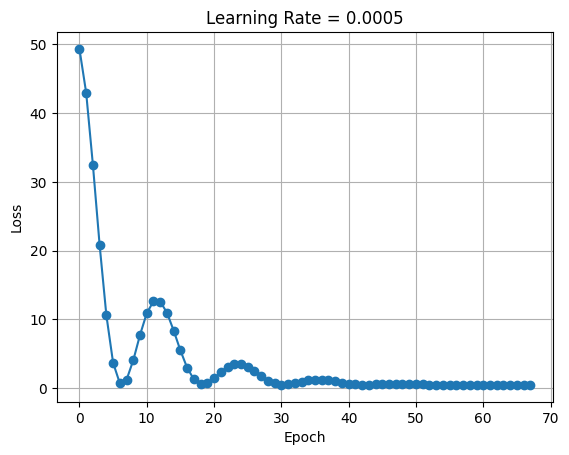

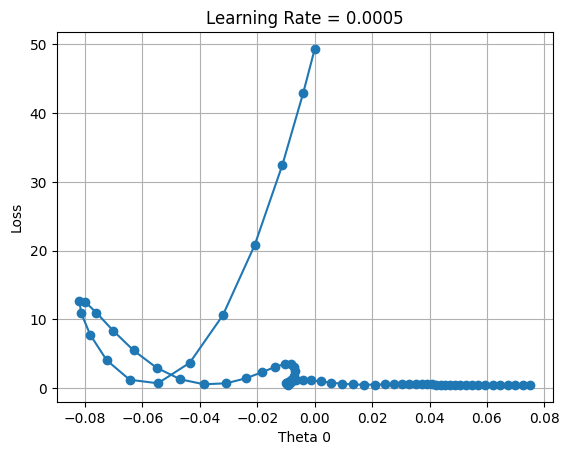

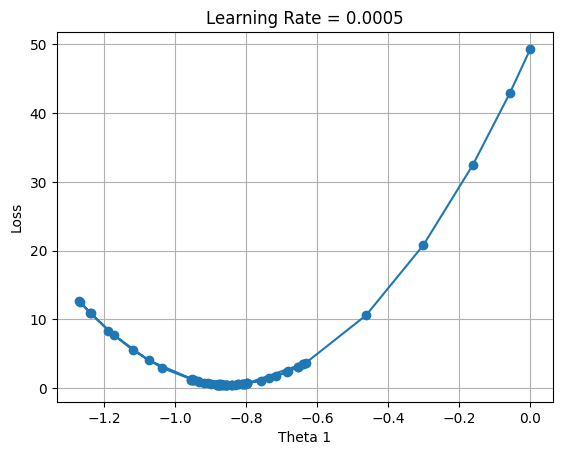

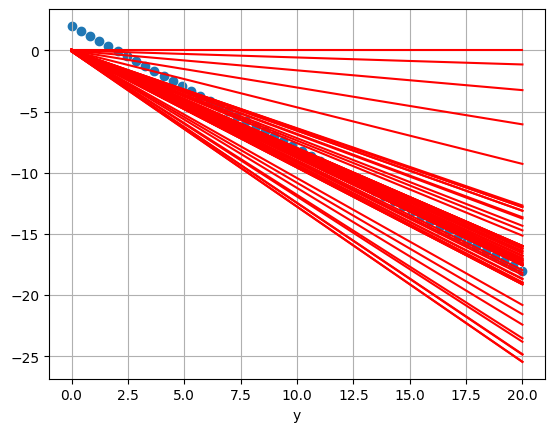

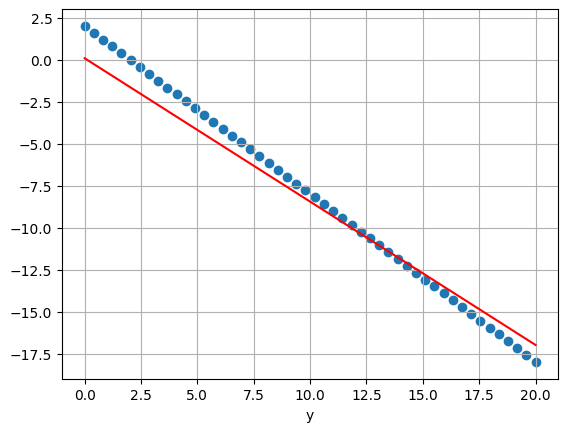

In [19]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [20]:
def Nag_GD(X, y, alpha, gamma, maxNumIters):

    gradient_check = 0.001
    cost_check = 0.01
    v_0 = 0
    v_1 = 0
    theta_0 = 0
    theta_1 = 0
    theta_0_temp = 0
    theta_1_temp = 0
    
    thetas_0_list = []
    thetas_1_list = []
    cost = []
    hypothesis = []
    for i in range(maxNumIters):
        print(f'****************** Epoch {i} ********************')
        print()

        m = len(X)

        thetas_0_list.append(theta_0)
        thetas_1_list.append(theta_1)

        # 2- Prediction
        h = theta_0_temp + theta_1_temp * X
        hypothesis.append(h)

        # 3- Evaluate Prediction (Calculate loss/cost function)
        error = h - y

        # j = np.sum(error**2) / (2*m) # --> Normal equation
        # j = np.linalg.norm(error)**2 / (2*m) # --> By vector Norm
        mse = error @ error / (2*m) # --> By dot product

        j = np.sum(mse)
        cost.append(j)

        # 4- Get gradient
        d_theta_0_temp = np.sum(error) / m
        d_theta_1_temp = np.sum(error*X) / m

        d_theta_temp = np.array([[d_theta_0_temp],
                                 [d_theta_1_temp]])
        
        d_theta_temp_norm = np.linalg.norm(d_theta_temp)

        # 5- Update parameters
        theta_0_temp = theta_0 - gamma * v_0
        theta_1_temp = theta_1 - gamma * v_1
        
        theta_0 = theta_0_temp - alpha * d_theta_0_temp
        theta_1 = theta_1_temp - alpha * d_theta_1_temp

        v_0 = gamma * v_0 + alpha * d_theta_0_temp
        v_1 = gamma * v_1 + alpha * d_theta_1_temp


        print('h(x):', h)
        print()
        
        print('Error Vector:\n', error)
        print()
        
        print('j = ', j)
        print()

        print('Gradient Vector:\n', d_theta_temp)
        print()
        
        print('Gradient Vector Norm:\n', d_theta_temp_norm)
        print()

        if i > 1:
            if d_theta_temp_norm <= gradient_check or abs(cost[-2] - cost[-1]) <= cost_check:
                break
        
        print('theta_0_new', theta_0)
        print('theta_1_new', theta_1)
        print()
        
        print('v_0', v_0)
        print('v_1', v_1)
        print()


    print('****************** Training Report ********************')
    print()

    print(f'Gradient Descent converged after {i+1} epochs')
    print()

    print('theta_0_Opt : ', theta_0)
    print('theta_1_Opt : ', theta_1)
    print()

    print('Error Vector:\n', error)
    print()

    print('Cost = ', j)
    print()

    print('h(x) = y_predict:\n', h)
    print()

    print('y_actual:\n', y)

    return thetas_0_list, thetas_1_list, cost, hypothesis, thetas_0_list[-1], thetas_1_list[-1]

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [21]:
alpha = 0.0005
gamma = 0.9
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Nag_GD(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new -0.004
theta_1_new -0.057346938775

In [22]:
h = theta_0_opt + theta_1_opt * X
r2_score(y, h)

0.9633837157380569

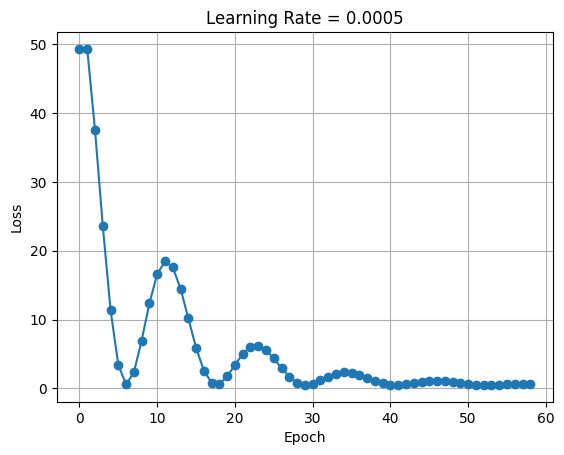

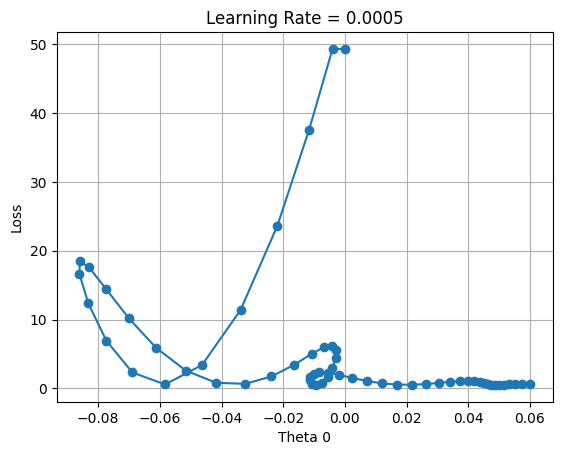

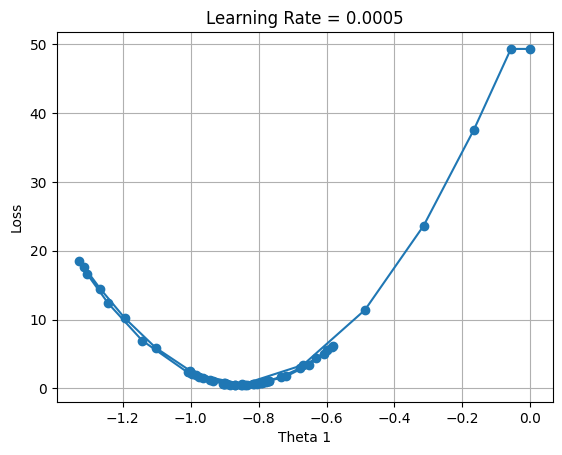

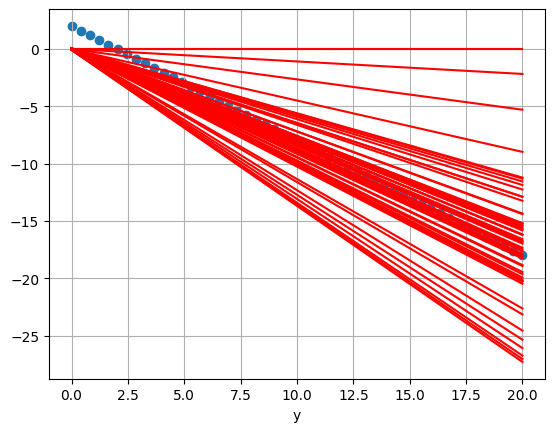

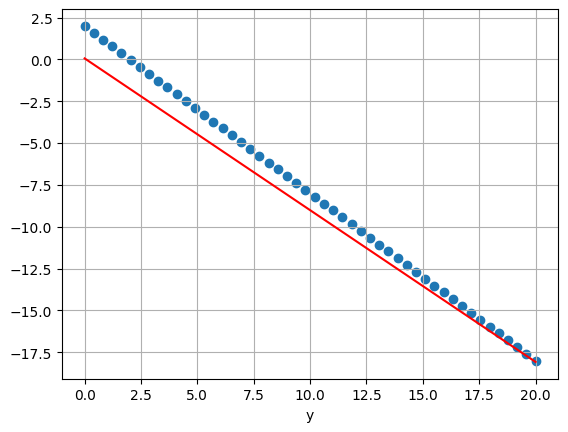

In [23]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [24]:
alpha = 0.0005
gamma = 0.89
iterations = 300
thetas_0_list, thetas_1_list, cost, hypothesis, theta_0_opt, theta_1_opt = Nag_GD(X, y, alpha, gamma, iterations)

****************** Epoch 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector:
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new -0.004
theta_1_new -0.057346938775

In [25]:
h = theta_0_opt + theta_1_opt * X
r2_score(y, h)

0.9712148523618332

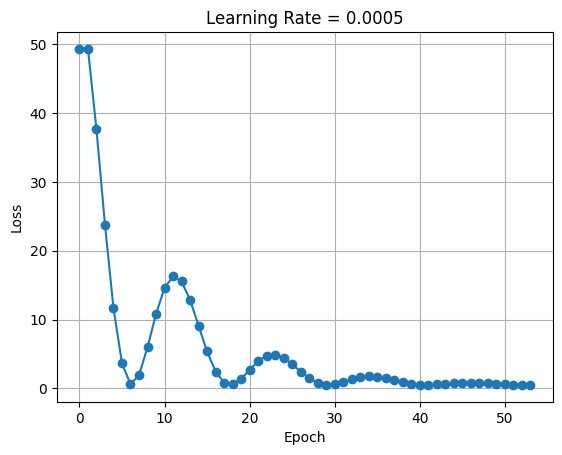

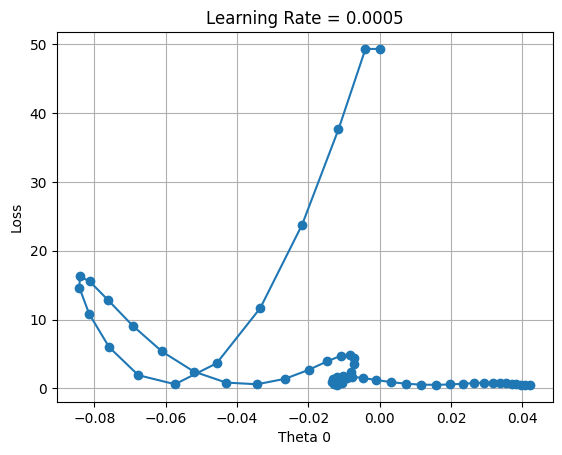

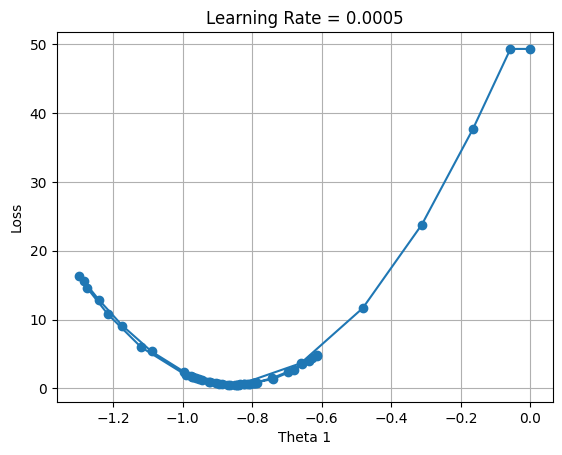

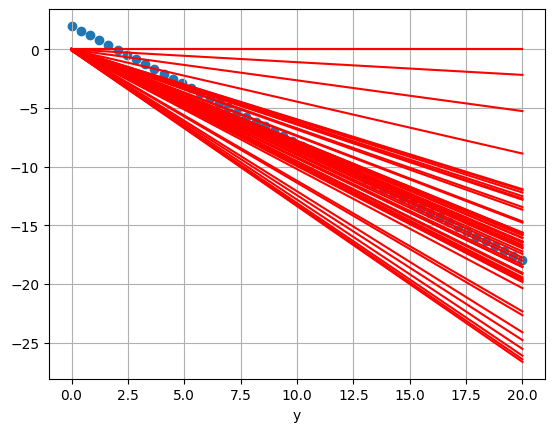

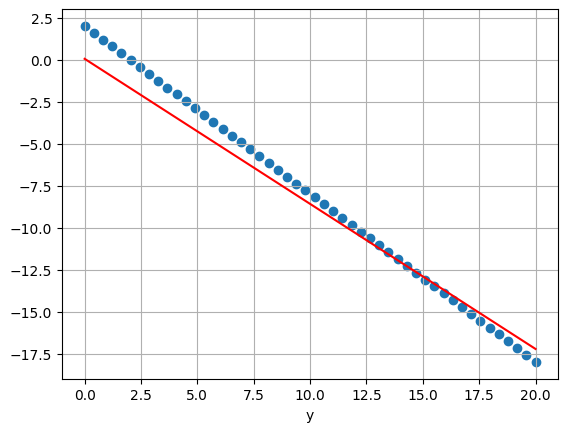

In [26]:
plot_loss_epoch(cost, alpha)
plot_theta_loss(thetas_0_list, cost, alpha, xlabel='Theta 0')
plot_theta_loss(thetas_1_list, cost, alpha, xlabel='Theta 1')
plot_lines(X, y, hypothesis)
plot_best_line(X, y, hypothesis[-1])